In [35]:
import pickle
import csv
import matplotlib.pyplot as plt


In [24]:
  

with open("/home/local/ASUAD/asing651/ResnetCifar10pytorchFI/DRDNA/b10c32/TAU3nosdc.pkl", 'rb') as f:
    TAU3nosdc = pickle.load(f)  
with open("/home/local/ASUAD/asing651/ResnetCifar10pytorchFI/DRDNA/b10c32/TAU2nosdc.pkl", 'rb') as f:
    TAU2nosdc = pickle.load(f)
with open("/home/local/ASUAD/asing651/ResnetCifar10pytorchFI/DRDNA/b10c32/TAU1nosdc.pkl", 'rb') as f:
    TAU1nosdc = pickle.load(f)

In [25]:
len(TAU1nosdc)

19

In [69]:
import csv

# Initialize dictionaries
TAU1oodsvhn = {}
TAU2oodsvhn = {}
TAU3oodsvhn = {}

# Read data from the CSV file
with open('/home/local/ASUAD/asing651/ResnetCifar10pytorchFI/DRDNA/b10c32/testwithOODoutput.csv', 'r') as file:
    reader = csv.reader(file)
    
    for row_index, row in enumerate(reader):
        # Initialize dictionaries for each row
        TAU1oodsvhn[row_index] = {}
        TAU2oodsvhn[row_index] = {}
        TAU3oodsvhn[row_index] = {}
        
        # Process each tuple in the row
        for item in row:
            # Remove parentheses and split by commas
            item = item.strip("()").split(", ")
            layername = item[0].strip("'")
            tau1 = float(item[1])
            tau2 = float(item[2])
            tau3 = float(item[3])
            
            # Populate the dictionaries
            TAU1oodsvhn[row_index][layername] = tau1
            TAU2oodsvhn[row_index][layername] = tau2
            TAU3oodsvhn[row_index][layername] = tau3

In [70]:
import csv

# Initialize dictionaries
TAU1advPGD = {}
TAU2advPGD = {}
TAU3advPGD = {}

# Read data from the CSV file
with open('/home/local/ASUAD/asing651/ResnetCifar10pytorchFI/DRDNA/b10c32/testwitadvPGDoutput.csv', 'r') as file:
    reader = csv.reader(file)
    
    for row_index, row in enumerate(reader):
        # Initialize dictionaries for each row
        TAU1advPGD[row_index] = {}
        TAU2advPGD[row_index] = {}
        TAU3advPGD[row_index] = {}
        
        # Process each tuple in the row
        for item in row:
            # Remove parentheses and split by commas
            item = item.strip("()").split(", ")
            layername = item[0].strip("'")
            tau1 = float(item[1])
            tau2 = float(item[2])
            tau3 = float(item[3])
            
            # Populate the dictionaries
            TAU1advPGD[row_index][layername] = tau1
            TAU2advPGD[row_index][layername] = tau2
            TAU3advPGD[row_index][layername] = tau3

In [34]:
import csv

# Initialize dictionaries
TAU1adv = {}
TAU2adv = {}
TAU3adv = {}

# Read data from the CSV file
with open('/home/local/ASUAD/asing651/ResnetCifar10pytorchFI/DRDNA/b10c32/testwitadvoutput.csv', 'r') as file:
    reader = csv.reader(file)
    
    for row_index, row in enumerate(reader):
        # Initialize dictionaries for each row
        TAU1adv[row_index] = {}
        TAU2adv[row_index] = {}
        TAU3adv[row_index] = {}
        
        # Process each tuple in the row
        for item in row:
            # Remove parentheses and split by commas
            item = item.strip("()").split(", ")
            layername = item[0].strip("'")
            tau1 = float(item[1])
            tau2 = float(item[2])
            tau3 = float(item[3])
            
            # Populate the dictionaries
            TAU1adv[row_index][layername] = tau1
            TAU2adv[row_index][layername] = tau2
            TAU3adv[row_index][layername] = tau3

# Now TAU1, TAU2, and TAU3 have the required structure


In [33]:
import csv

# Initialize dictionaries
TAU1nosdc = {}
TAU2nosdc = {}
TAU3nosdc = {}

# Read data from the CSV file
with open('/home/local/ASUAD/asing651/ResnetCifar10pytorchFI/DRDNA/b10c32/testwithoutSDC.csv', 'r') as file:
    reader = csv.reader(file)
    
    for row_index, row in enumerate(reader):
        # Initialize dictionaries for each row
        TAU1nosdc[row_index] = {}
        TAU2nosdc[row_index] = {}
        TAU3nosdc[row_index] = {}
        
        # Process each tuple in the row
        for item in row:
            # Remove parentheses and split by commas
            item = item.strip("()").split(", ")
            layername = item[0].strip("'")
            tau1 = float(item[1])
            tau2 = float(item[2])
            tau3 = float(item[3])
            
            # Populate the dictionaries
            TAU1nosdc[row_index][layername] = tau1
            TAU2nosdc[row_index][layername] = tau2
            TAU3nosdc[row_index][layername] = tau3

# Now TAU1, TAU2, and TAU3 have the required structure

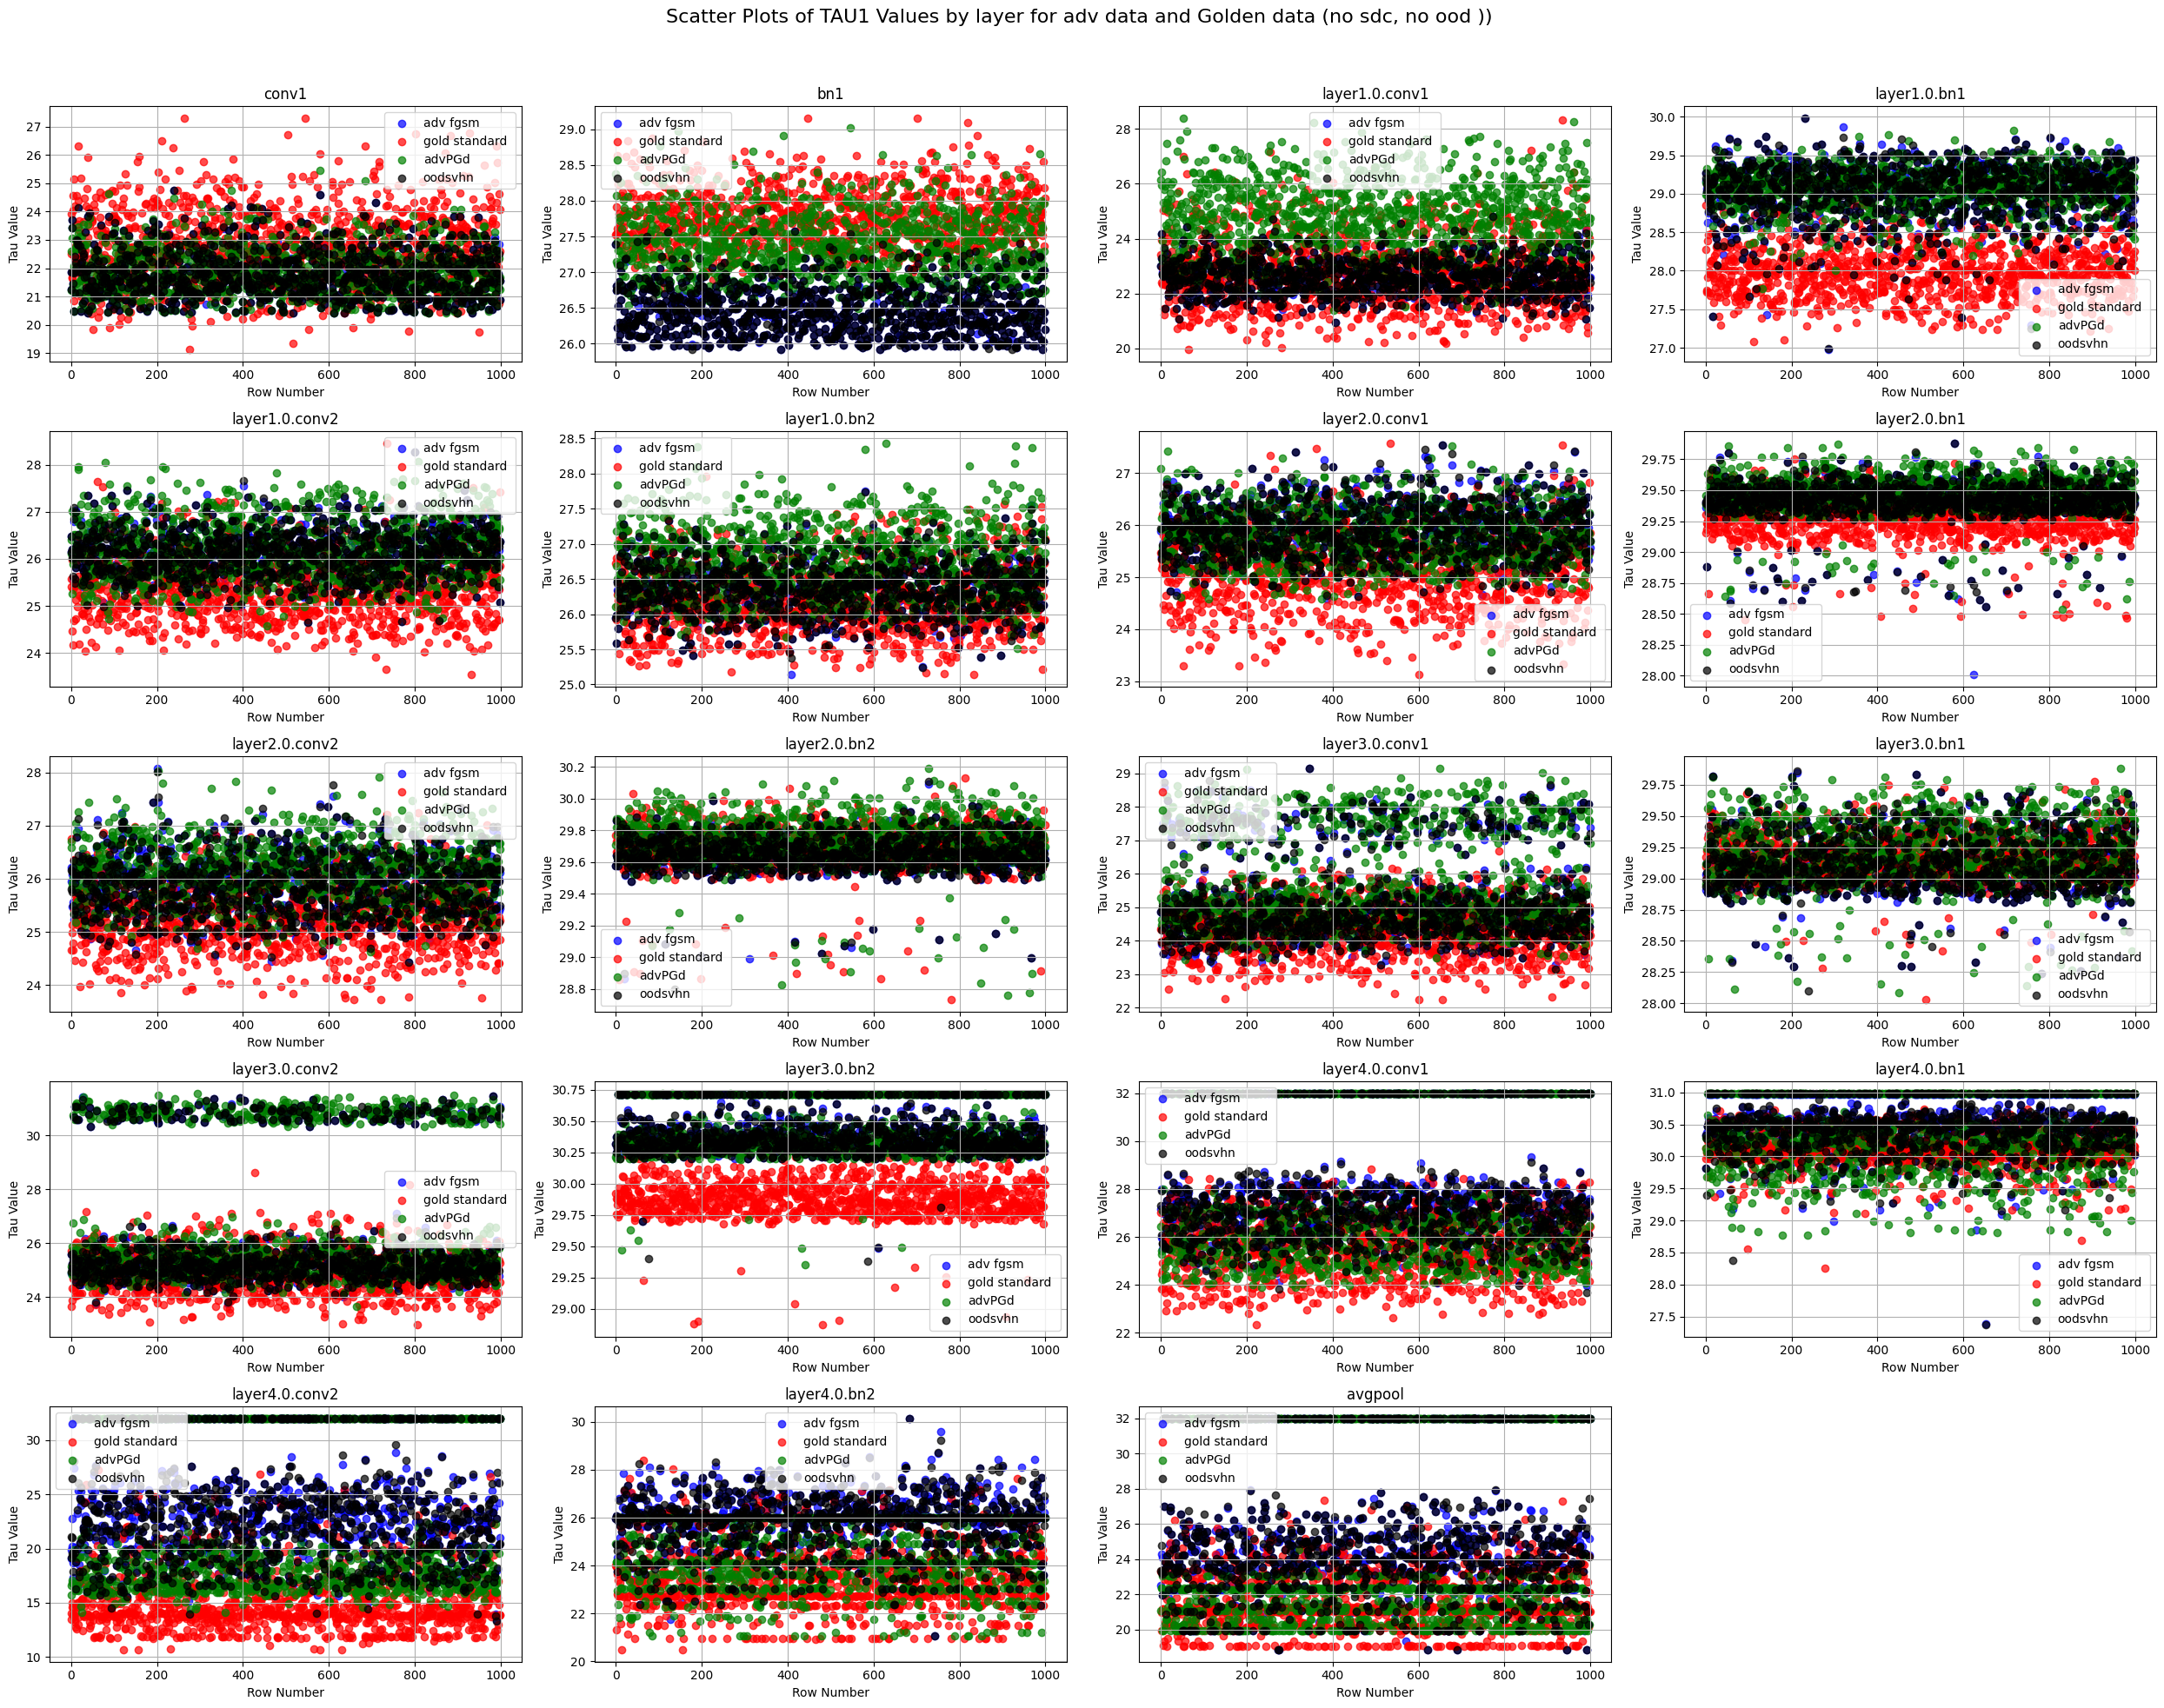

In [76]:
import matplotlib.pyplot as plt
import math

# Get unique layer names
layer_names = list(TAU1adv[0].keys())
num_layers = len(layer_names)

# Determine grid layout (e.g., 4x4 for 16 layers, adjust as necessary)
cols = 4
rows = math.ceil(num_layers / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(25, 20))
fig.suptitle('Scatter Plots of TAU1 Values by layer for adv data and Golden data (no sdc, no ood )) ', fontsize=16)

# Plot each layer in its own subplot
for idx, layer_name in enumerate(layer_names):
    # Calculate row and column index for subplot
    row_idx = idx // cols
    col_idx = idx % cols
    
    data1 = [ TAU1adv[key][layer_name] for key in TAU1adv ]
    data2 = [ TAU1nosdc[key][layer_name] for key in TAU1nosdc ]
    data3 = [ TAU1advPGD[key][layer_name] for key in TAU1advPGD ]
    data4 = [ TAU1oodsvhn[key][layer_name] for key in TAU1oodsvhn ]
    row_indices = list(range(1000))
    
    # Scatter plot for this layer
    ax = axes[row_idx, col_idx]
    ax.scatter(row_indices, data1[:1000], color='blue', label='adv fgsm', alpha=0.7)
    ax.scatter(row_indices, data2[:1000], color='red', label='gold standard ', alpha=0.7)
    ax.scatter(row_indices, data3[:1000], color='green', label='advPGd', alpha=0.7)
    ax.scatter(row_indices, data4[:1000], color='black', label='oodsvhn', alpha=0.7)
    ax.set_title(layer_name)
    ax.set_xlabel('Row Number')
    ax.set_ylabel('Tau Value')
    ax.legend()
    ax.grid(True)

# Hide any empty subplots
for idx in range(num_layers, rows * cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


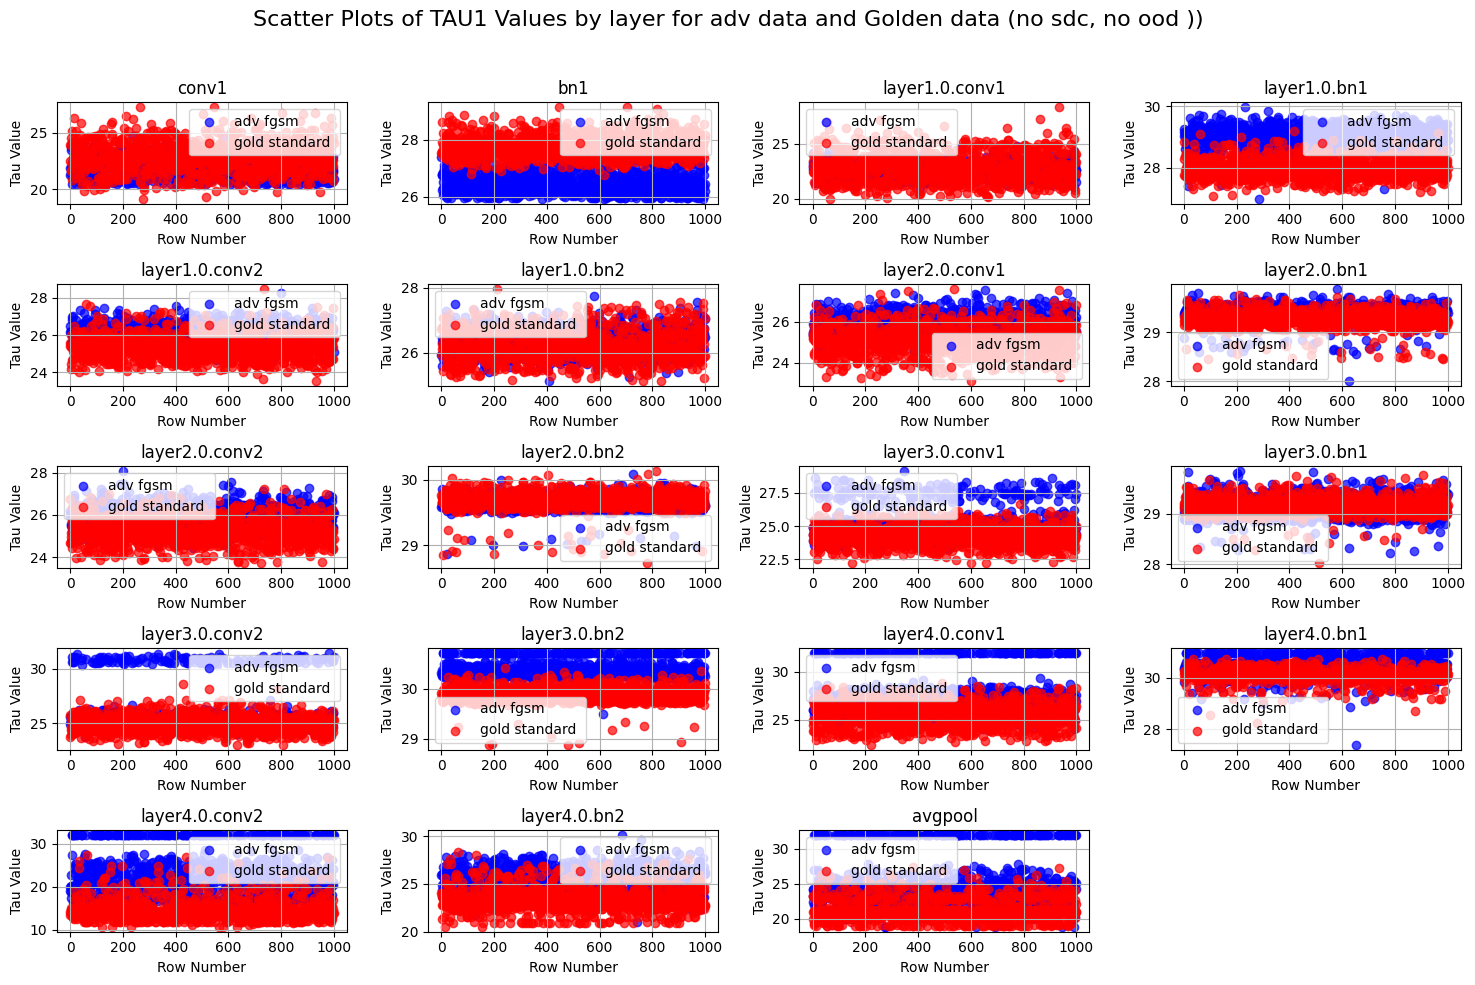

In [75]:
import matplotlib.pyplot as plt
import math

# Get unique layer names
layer_names = list(TAU1adv[0].keys())
num_layers = len(layer_names)

# Determine grid layout (e.g., 4x4 for 16 layers, adjust as necessary)
cols = 4
rows = math.ceil(num_layers / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.suptitle('Scatter Plots of TAU1 Values by layer for adv data and Golden data (no sdc, no ood )) ', fontsize=16)

# Plot each layer in its own subplot
for idx, layer_name in enumerate(layer_names):
    # Calculate row and column index for subplot
    row_idx = idx // cols
    col_idx = idx % cols
    
    data1 = [ TAU1adv[key][layer_name] for key in TAU1adv ]
    data2 = [ TAU1nosdc[key][layer_name] for key in TAU1nosdc ]
    # data3 = [ TAU1advPGD[key][layer_name] for key in TAU1advPGD ]
    # data4 = [ TAU1oodsvhn[key][layer_name] for key in TAU1oodsvhn ]
    row_indices = list(range(1000))
    
    # Scatter plot for this layer
    ax = axes[row_idx, col_idx]
    ax.scatter(row_indices, data1[:1000], color='blue', label='adv fgsm', alpha=0.7)
    ax.scatter(row_indices, data2[:1000], color='red', label='gold standard ', alpha=0.7)
    # ax.scatter(row_indices, data3[:1000], color='green', label='advPGd', alpha=0.7)
    # ax.scatter(row_indices, data4[:1000], color='black', label='oodsvhn', alpha=0.7)
    ax.set_title(layer_name)
    ax.set_xlabel('Row Number')
    ax.set_ylabel('Tau Value')
    ax.legend()
    ax.grid(True)

# Hide any empty subplots
for idx in range(num_layers, rows * cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


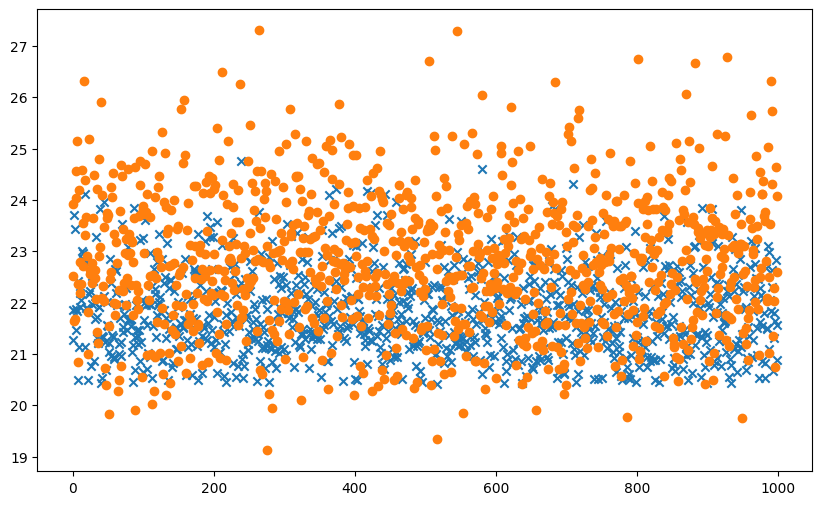

In [59]:
TAU1advlayer2 = [TAU1adv[key]['layer1.0.conv1'] for key in TAU1adv ]
TAU1nosdclayer2 = [ TAU1nosdc[key]['layer1.0.conv1'] for key in TAU1nosdc ]
rows = list(range(1000))
plt.figure(figsize=(10,6))
plt.scatter(rows,TAU1advlayer1[:1000],label = "TAU1adv", marker = 'x')
plt.scatter(rows,TAU1nosdclayer1[:1000],label = "TAU1adv", marker = 'o')

ValueError: x and y must be the same size

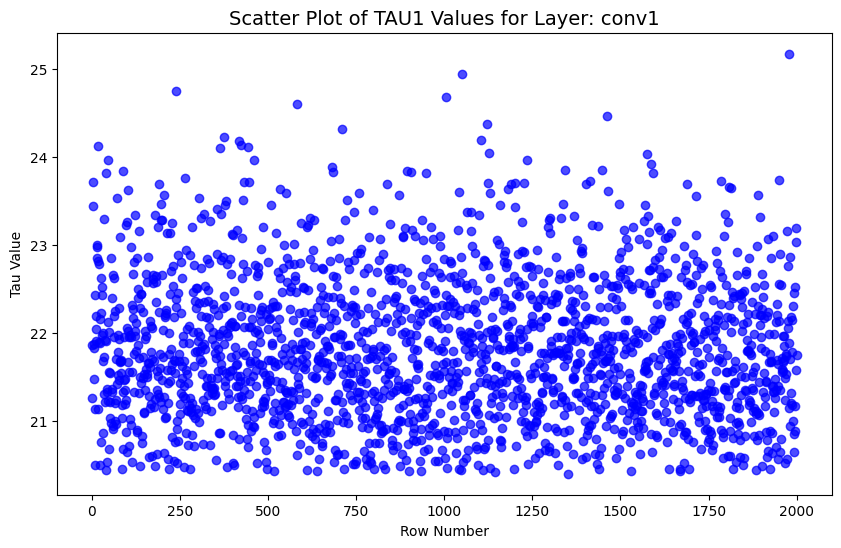

In [ ]:
import matplotlib.pyplot as plt
import math
import os

# Ensure that the required data structures (TAU1adv, TAU1nosdc, etc.) are defined
# For example:
# TAU1adv = [{layer1: value1, layer2: value2, ...}, ...]
# Similarly define TAU1nosdc, TAU1advPGD, TAU1oodsvhn

# Get unique layer names
layer_names = list(TAU1adv[0].keys())
num_layers = len(layer_names)

# Directory to save individual plots (optional)
output_dir = 'layer_scatter_plots'
os.makedirs(output_dir, exist_ok=True)

# Iterate over each layer and create a separate plot
for idx, layer_name in enumerate(layer_names, 1):
    # Extract data for the current layer
    data1 = [TAU1adv[key][layer_name] for key in TAU1adv]
    data2 = [TAU1nosdc[key][layer_name] for key in TAU1nosdc]
    data3 = [TAU1advPGD[key][layer_name] for key in TAU1advPGD]
    data4 = [TAU1oodsvhn[key][layer_name] for key in TAU1oodsvhn]
    row_indices = list(range(1000))  # Assuming data1 has the same length as others

    # Create a new figure for the current layer
    plt.figure(figsize=(10, 6))
    plt.title(f'Scatter Plot of TAU1 Values for Layer: {layer_name}', fontsize=14)
    plt.xlabel('Row Number')
    plt.ylabel('Tau Value')

    # Plot scatter points for each dataset
    plt.scatter(row_indices, data1[:1000], color='blue', label='adv fgsm', alpha=0.7)
    plt.scatter(row_indices, data2[:1000], color='red', label='gold standard', alpha=0.7)
    plt.scatter(row_indices, data3[:1000], color='green', label='advPGD', alpha=0.7)
    plt.scatter(row_indices, data4[:1000], color='black', label='oodsvhn', alpha=0.7)

    # Add legend and grid
    plt.legend()
    plt.grid(True)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Optionally, save each plot to a file
    plot_filename = os.path.join(output_dir, f'scatter_{layer_name}.png')
    plt.savefig(plot_filename)
    print(f"Saved plot for layer '{layer_name}' as '{plot_filename}'.")

    # Display the plot (optional)
    plt.show()

    # Close the figure to free up memory
    plt.close()


PLots gold standard vs OOD
